In [6]:
%matplotlib notebook
import numpy as np 
import matplotlib.pyplot as plt 
from skimage.feature import match_template
from PIL import Image
ImageTotal = np.asarray(Image.open('Healthy (17).jpg'))

<IPython.core.display.Javascript object>


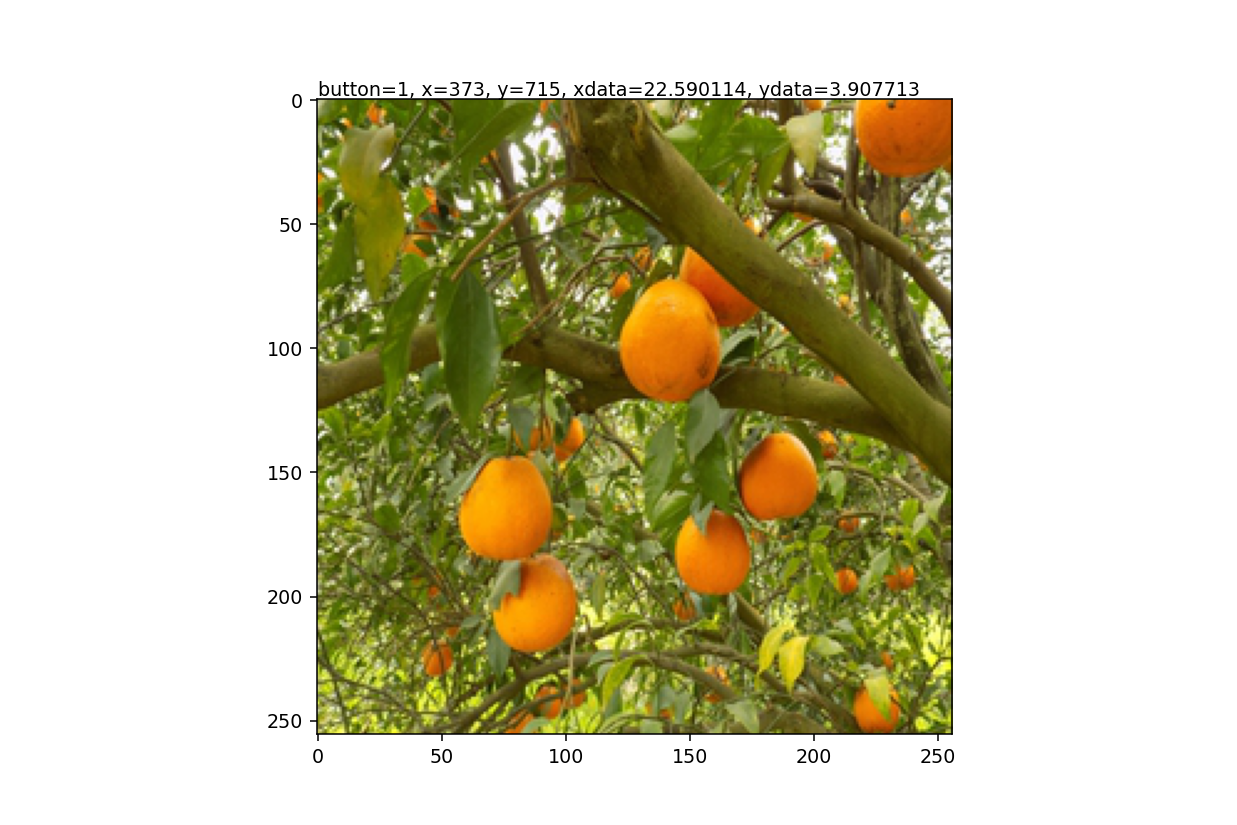

In [17]:
puntosinteres = []
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
ax.imshow(ImageTotal , cmap=plt.cm.gray)
text=ax.text(0,0,"",va="bottom", ha="left")
def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)
    puntosinteres.append([event.xdata, event.ydata])
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [18]:
len(puntosinteres)

18

<IPython.core.display.Javascript object>


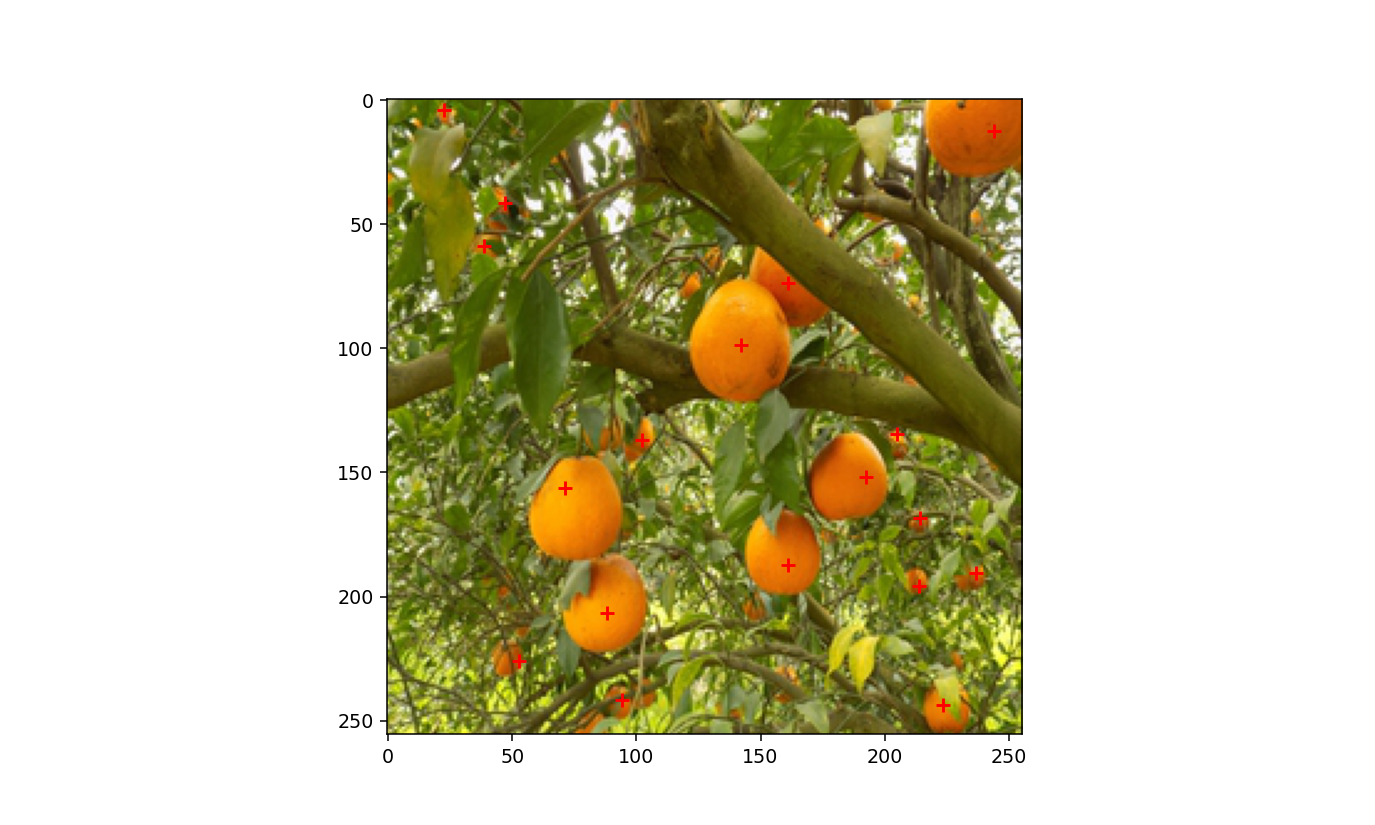

In [19]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.imshow(ImageTotal, cmap=plt.cm.gray)
ax.scatter([x[0] for x in puntosinteres],[y[1] for y in puntosinteres],c='red', marker='+',s=50)
text=ax.text(0,0,"",va="bottom", ha="left")
def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)
    puntosinteres.append([event.xdata, event.ydata])
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


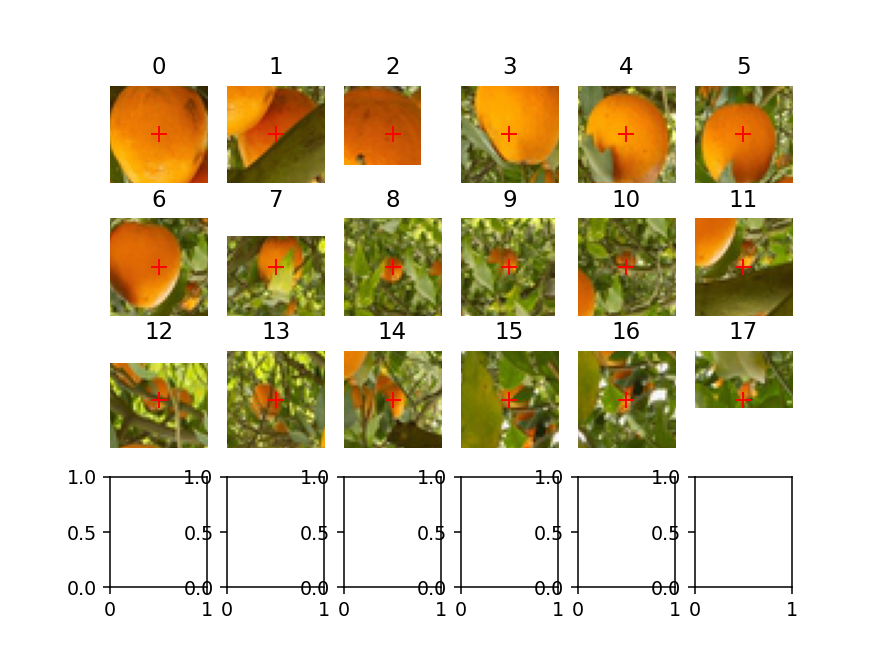

In [20]:
fig, ax = plt.subplots(len(puntosinteres)//6+1, 6)
i=0
for item in puntosinteres:
    xinteres = int(item[0])
    yinteres = int(item[1])
    radio = 20
    ax[i//6,i-i//6*6].imshow(ImageTotal)
    ax[i//6,i-i//6*6].plot(xinteres,yinteres,color='red', linestyle='dashed',marker='+',markerfacecolor='blue', markersize='8')
    ax[i//6,i-i//6*6].set_xlim(xinteres-radio,xinteres+radio)
    ax[i//6,i-i//6*6].set_ylim(yinteres-radio,yinteres+radio)
    ax[i//6,i-i//6*6].axis('off')
    ax[i//6,i-i//6*6].set_title(i)
    i+=1

In [6]:
#del puntosinteres[21]
#len(puntosinteres)

In [27]:
listaresultados = []
for punto in puntosinteres:
    xinteres = int(punto[0])
    yinteres = int(punto[1])
    radio=10
    imageband = ImageTotal[:,:,0]
    templateband = ImageTotal[yinteres-radio:yinteres+radio,xinteres-radio:xinteres+radio,0]
    result = match_template(imageband, templateband)
    result = np.where(result>0.75)
    listaresultados.append(result)

C:\Users\Gayatri gajbhiye\anaconda3\lib\site-packages\skimage\feature\template.py:141: RuntimeWarning: Mean of empty slice.
  template_mean = template.mean()
C:\Users\Gayatri gajbhiye\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: too many indices for array

<IPython.core.display.Javascript object>


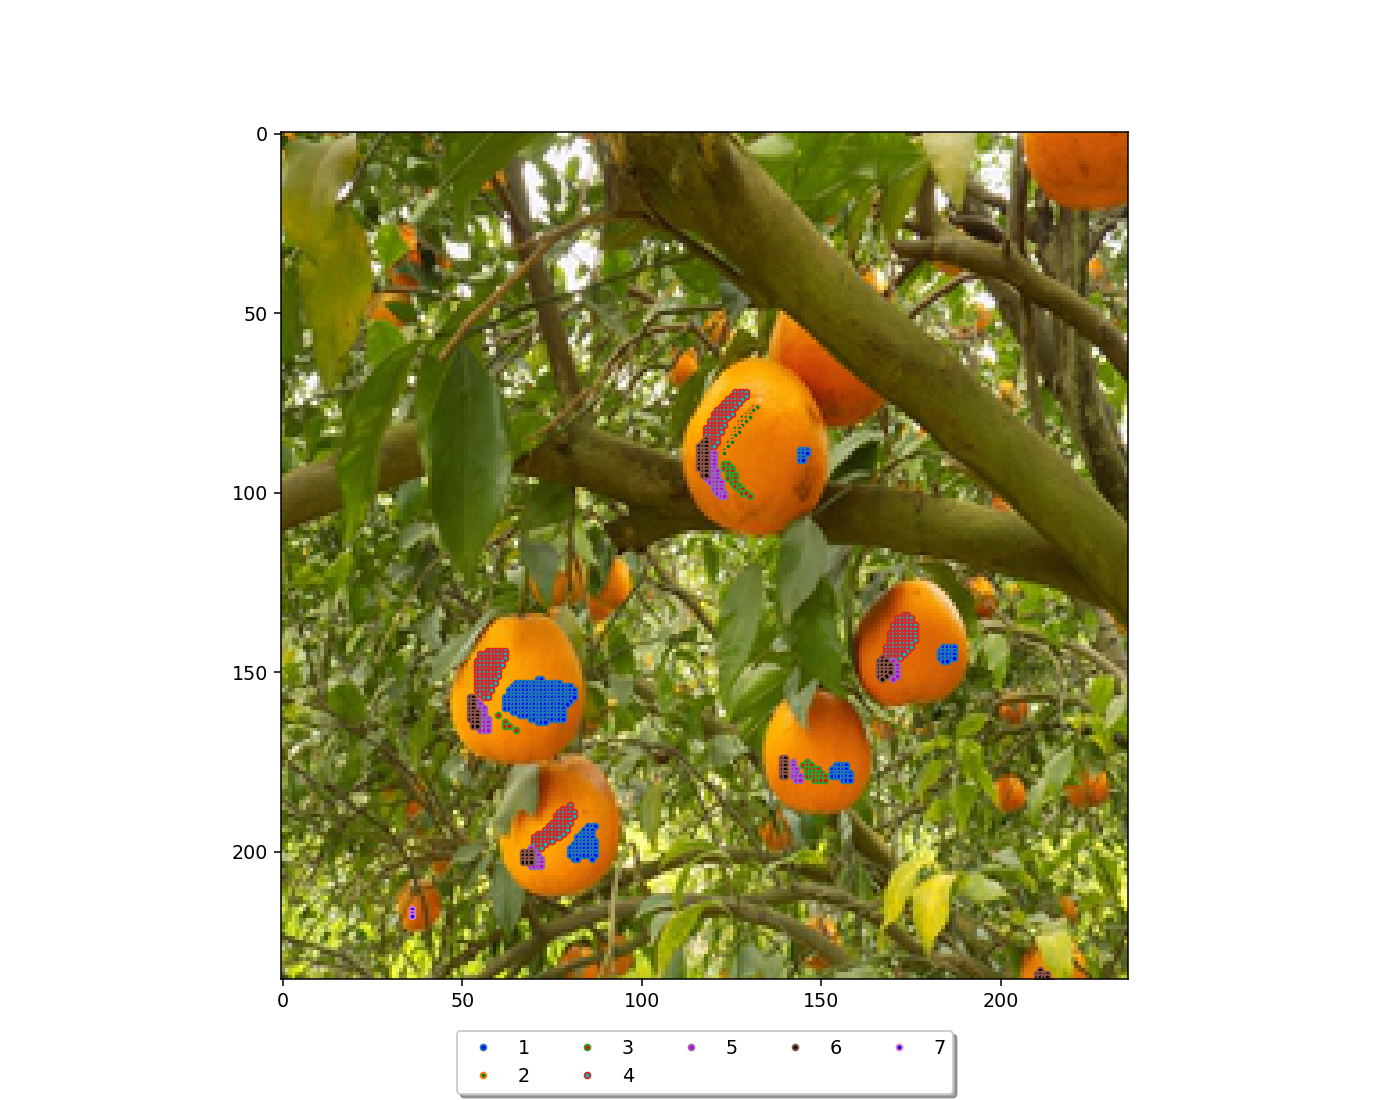

In [13]:
from itertools import cycle
cycol = cycle('bgrcmk')

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

i = 1
for lista in listaresultados:
    ax.plot(lista[1],lista[0],'.',linewidth=0, markerfacecolor=next(cycol), label=i)
    i+=1
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
ax.imshow(ImageTotal[radio:-radio,radio:-radio,:])


In [22]:
datalist = [np.asarray(pares).T for pares in listaresultados]
print(len(datalist))
datalist = np.vstack(datalist)
print(datalist)

17
[[  0 233]
 [  0 234]
 [  0 235]
 ...
 [ 30  36]
 [ 31  36]
 [ 32  36]]


<IPython.core.display.Javascript object>


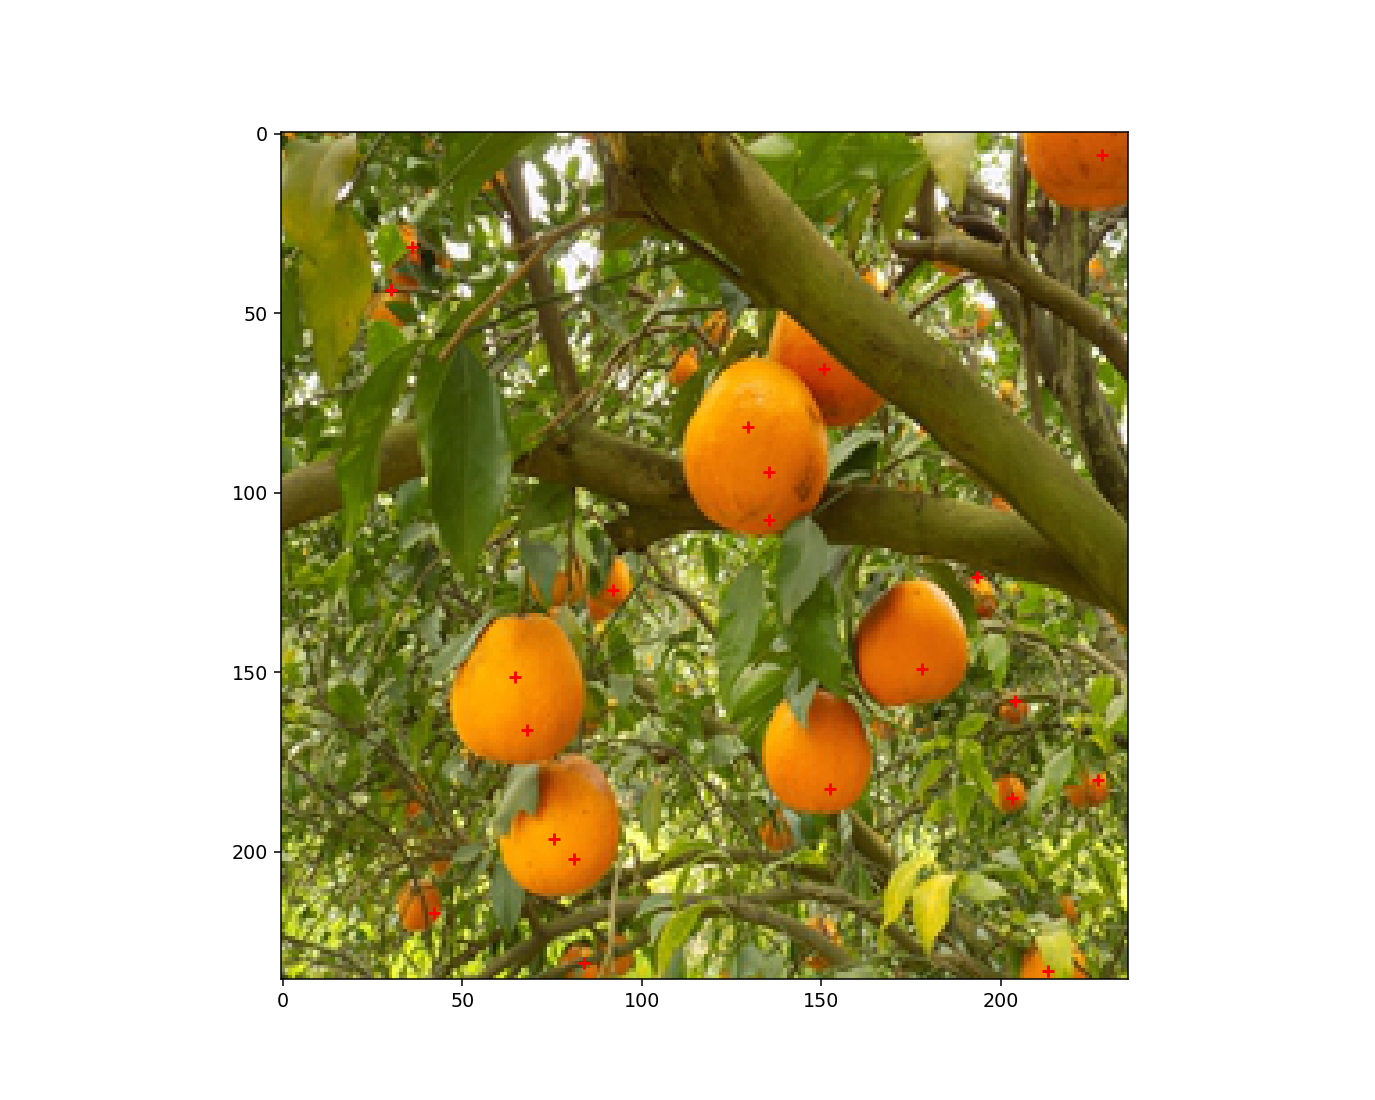

In [25]:
from sklearn.cluster import Birch
brc = Birch(branching_factor=10000, n_clusters=None, threshold=9, compute_labels=True)
brc.fit(datalist)
puntobirch = brc.subcluster_centers_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(puntobirch[:,[1]],puntobirch[:,[0]],marker='+',color='red')
ax.imshow(ImageTotal[radio:-radio,radio:-radio,:])          

In [26]:
len(puntobirch)

21